In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("star_classification.csv")

In [22]:
class SVM:
    def __init__(self, eta, C, niter, batch_size, verbose):
        self.eta = eta
        self.C = C
        self.niter = niter
        self.batch_size = batch_size
        self.verbose = verbose


    def make_one_versus_all_labels(self, y, m):
        """
        y : numpy array of shape (n,)
        m : int (num_classes)
        returns : numpy array of shape (n, m)
        """

        #W = np.zeros((len(y), m))
        # Create an array filled with -1 of shape (len(y), m)
        one_v_all_labels = -1 * np.ones((len(y), m))

        # For each label in y, set the corresponding column in one_v_all_labels to 1
        for i in range(len(y)):
            one_v_all_labels[i, y[i]] = 1

        return one_v_all_labels

    def compute_loss(self, x, y):
        """
        x : numpy array of shape (minibatch size, num_features)
        y : numpy array of shape (minibatch size, num_classes)
        returns : float
        """

            # Compute the scores
        scores = np.dot(x, self.w)

        # Compute the margins
        margins = np.maximum(0, 2 - y * scores)**2

        # Compute the loss
        loss = np.mean(np.sum(margins, axis=1))

        # Add regularization
        loss += 0.5 * self.C * np.sum(self.w * self.w)

        return loss

    def compute_gradient(self, x, y):
        """
        x : numpy array of shape (minibatch size, num_features)
        y : numpy array of shape (minibatch size, num_classes)
        returns : numpy array of shape (num_features, num_classes)
        """
        margins = np.maximum(0, 2 - np.multiply(x @ self.w, y))
        dw = -2 * (x.T @ np.multiply(margins,y))

        dw /= x.shape[0]

        dw += self.C * self.w

        return dw

    # Batcher function
    def minibatch(self, iterable1, iterable2, size=1):
        l = len(iterable1)
        n = size

        for ndx in range(0, l, n):

            index2 = min(ndx + n, l)

            yield iterable1[ndx: index2], iterable2[ndx: index2]

    def infer(self, x):
        """
        x : numpy array of shape (num_examples_to_infer, num_features)
        returns : numpy array of shape (num_examples_to_infer, num_classes)
        """
            # Compute the scores
        scores = np.dot(x, self.w)

        # Get the indices of the max score for each example
        y_pred = np.argmax(scores, axis=1)

        # Create an array filled with -1 of shape (len(y_pred), num_classes)
        y_inferred = -1 * np.ones((len(y_pred), self.m))

        # For each predicted label, set the corresponding column in y_inferred to 1
        # for i in range(len(y_pred)):
        #     y_inferred[i, y_pred[i]] = 1
        y_inferred[np.arange(len(y_pred)), y_pred] = 1

        return y_inferred

    def compute_accuracy(self, y_inferred, y):
        """
        y_inferred : numpy array of shape (num_examples, num_classes)
        y : numpy array of shape (num_examples, num_classes)
        returns : float
        """
            # Convert one-versus-all labels to single labels
        y_inferred_single = np.argmax(y_inferred, axis=1)
        y_single = np.argmax(y, axis=1)

        # Compute the number of correct predictions
        correct_predictions = np.sum(y_inferred_single == y_single)

        # Compute the accuracy
        accuracy = correct_predictions / len(y_single)

        return accuracy

    def fit(self, x_train, y_train, x_test, y_test):
        """
        x_train : numpy array of shape (number of training examples, num_features)
        y_train : numpy array of shape (number of training examples, num_classes)
        x_test : numpy array of shape (number of training examples, nujm_features)
        y_test : numpy array of shape (number of training examples, num_classes)
        returns : float, float, float, float
        """
        self.num_features = x_train.shape[1]
        self.m = y_train.max() + 1
        y_train = self.make_one_versus_all_labels(y_train, self.m)
        y_test = self.make_one_versus_all_labels(y_test, self.m)
        self.w = np.zeros([self.num_features, self.m])

        train_losses = []
        train_accs = []
        test_losses = []
        test_accs = []

        for iteration in range(self.niter):
            # Train one pass through the training set
            for x, y in self.minibatch(x_train, y_train, size=self.batch_size):
                grad = self.compute_gradient(x, y)
                self.w -= self.eta * grad

            # Measure loss and accuracy on training set
            train_loss = self.compute_loss(x_train, y_train)
            y_inferred = self.infer(x_train)
            train_accuracy = self.compute_accuracy(y_inferred, y_train)

            # Measure loss and accuracy on test set
            test_loss = self.compute_loss(x_test, y_test)
            y_inferred = self.infer(x_test)
            test_accuracy = self.compute_accuracy(y_inferred, y_test)

            if self.verbose:
                print(f"Iteration {iteration} | Train loss {train_loss:.04f} | Train acc {train_accuracy:.04f} |"
                      f" Test loss {test_loss:.04f} | Test acc {test_accuracy:.04f}")

            # Record losses, accs
            train_losses.append(train_loss)
            train_accs.append(train_accuracy)
            test_losses.append(test_loss)
            test_accs.append(test_accuracy)

        return train_losses, train_accs, test_losses, test_accs


Loading data...
Fitting the model...
Training model with C=1...
Training model with C=5...
Training model with C=10...


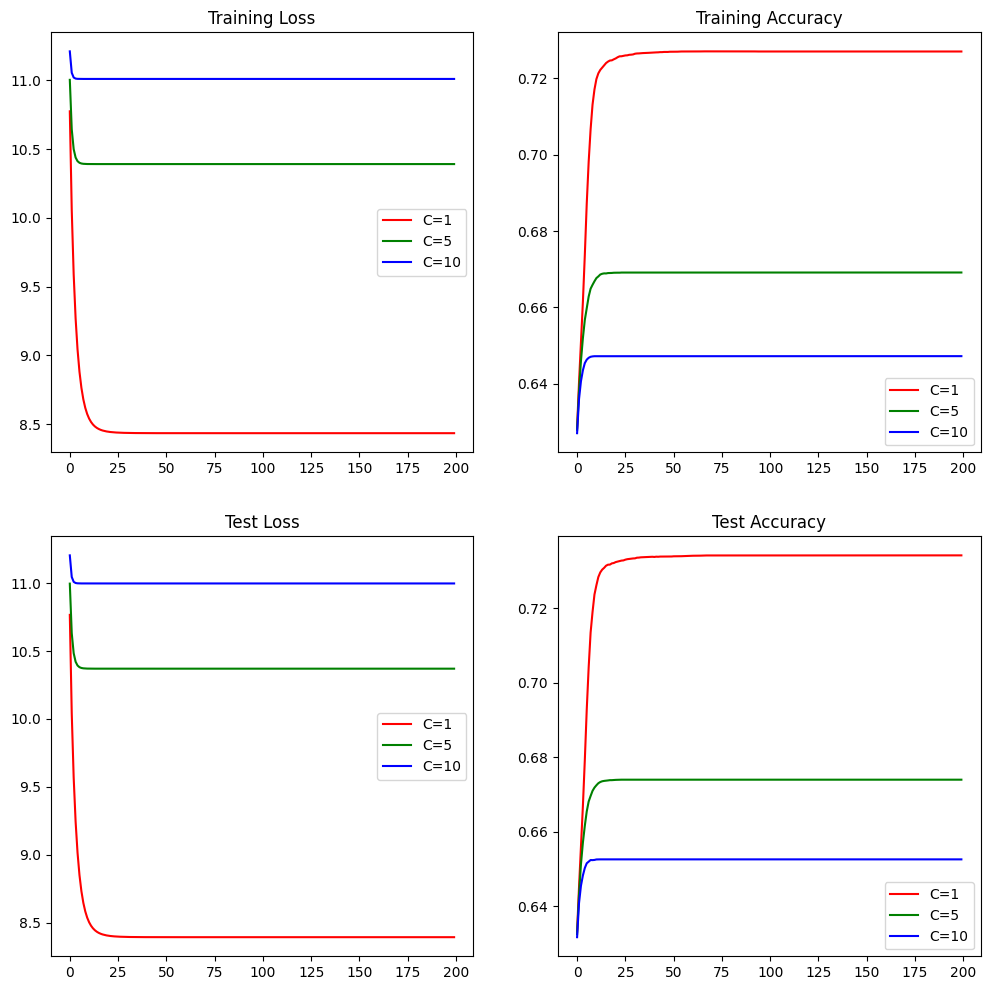

In [24]:
# DO NOT MODIFY THIS FUNCTION
# Data should be downloaded from the below url, and the
# unzipped folder should be placed in the same directory
# as your solution file:.
def load_data():
    # Load the data files
    print("Loading data...")
    data_path = "Star_classification/"
    dataset = pd.read_csv("star_classification.csv")
    y = dataset['class']
    x = dataset.drop(['class','rerun_ID'], axis=1)

    #we replace the dataset class with a number (the class are : 'GALAXY' 'QSO' 'STAR')
    y = y.replace('GALAXY', 0)
    y = y.replace('QSO', 1)
    y = y.replace('STAR', 2)

    #split dataset in train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=40)

    #convert sets to numpy arrays
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test=np.array(y_test)

    # normalize the data
    mean = x_train.mean(axis=0)
    std = x_train.std(axis=0)
    x_train = (x_train - mean) / std
    x_test = (x_test - mean) / std

    # add implicit bias in the feature
    x_train = np.concatenate([x_train, np.ones((x_train.shape[0], 1))], axis=1)
    x_test = np.concatenate([x_test, np.ones((x_test.shape[0], 1))], axis=1)

    return x_train, y_train, x_test, y_test


if __name__ == "__main__":

    x_train, y_train, x_test, y_test = load_data()
    print("Fitting the model...")

    C_values = [1,5,10]
    colors = ['r', 'g', 'b']
    labels = ['C=1', 'C=5', 'C=10']

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))

    for i, C in enumerate(C_values):
        print(f"Training model with C={C}...")
        svm = SVM(eta=0.0001, C=C, niter=200, batch_size=100, verbose=False)
        train_losses, train_accs, test_losses, test_accs = svm.fit(x_train, y_train, x_test, y_test)

        axs[0, 0].plot(train_losses, color=colors[i], label=labels[i])
        axs[0, 1].plot(train_accs, color=colors[i], label=labels[i])
        axs[1, 0].plot(test_losses, color=colors[i], label=labels[i])
        axs[1, 1].plot(test_accs, color=colors[i], label=labels[i])

    axs[0, 0].set_title('Training Loss')
    axs[0, 1].set_title('Training Accuracy')
    axs[1, 0].set_title('Test Loss')
    axs[1, 1].set_title('Test Accuracy')

    for ax in axs.flat:
        ax.legend()

    plt.savefig("plots.png", dpi=300)

    plt.show()

        # to infer after training, do the following:
   # y_inferred = SVM.infer(x_test)

    # to compute the gradient or loss before training, do the following:
    # y_train_ova = SVM.make_one_versus_all_labels(y_train, 3) # one-versus-all labels
    # SVM.w = np.zeros([x_train.shape[1], 3])
    # grad = SVM.compute_gradient(x_train, y_train_ova)
    # loss = SVM.compute_loss(x_train, y_train_ova)


In [28]:
svm = SVM(eta=0.0001, C=1, niter=200, batch_size=100, verbose=False)
train_losses, train_accs, test_losses, test_accs = svm.fit(x_train, y_train, x_test, y_test)

In [3]:
# # Initialize the SVM class
# svm = SVM(eta=0.0001, C=1, niter=200, batch_size=100, verbose=False)

In [ ]:
# # Fit the model and get the losses and accuracies
# train_losses, train_accs, test_losses, test_accs = svm.fit(x_train, y_train, x_test, y_test)

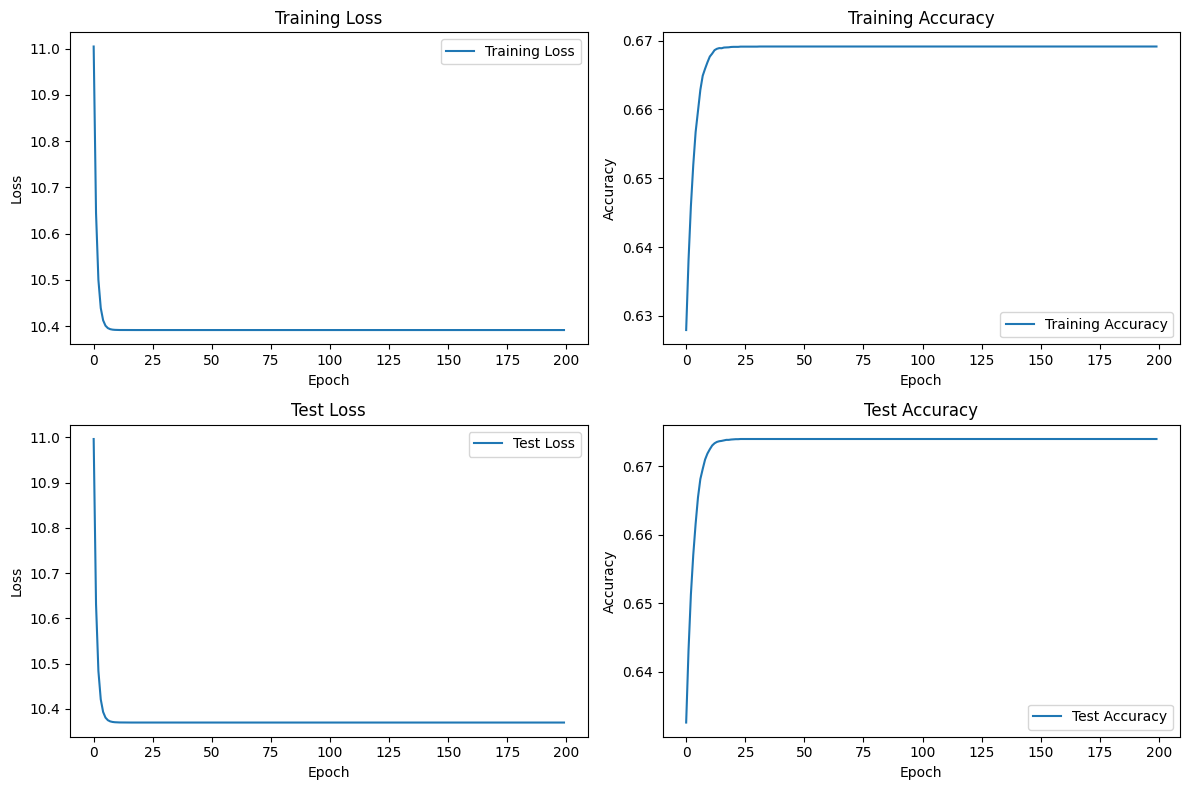

In [27]:
# Plot the training loss, training accuracy, test loss, and test accuracy
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(test_losses, label='Test Loss')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(test_accs, label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:


y_train = np.array([
    [1, 0, 0, 0],  # example 1 belongs to class 1
    [0, 1, 0, 0],  # example 2 belongs to class 2
    [0, 0, 1, 0]   # example 3 belongs to class 3
])



In [ ]:
y_train.max()

1